<a href="https://colab.research.google.com/github/poorya-abbasi/DL-HW03/blob/main/DenseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [3]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [4]:
!kaggle datasets download -d pratik2901/multiclass-weather-dataset

multiclass-weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

 best-val-acc-model.h5			  kaggle.json
 data					 'Multi-class Weather Dataset'
 Dense-Conv2D-Pooling-Dropout-K-fold.h5   multiclass-weather-dataset.zip


In [6]:
base_dir = '/content/drive/My Drive/Kaggle/'
!unzip -u "multiclass-weather-dataset.zip" -d '/content/drive/My Drive/Kaggle/'
dataset_dir_name = 'Multi-class Weather Dataset'
dataset_dir = base_dir + dataset_dir_name

Archive:  multiclass-weather-dataset.zip


In [7]:
max_height = -1
max_width = -1

In [8]:
import cv2
import imutils
import numpy as np


In [ ]:
'''images = []
labels = []
convert = {'Cloudy':0, 'Rain':1, 'Shine':2, 'Sunrise':3}

path = dataset_dir
print(os.listdir(path))
for filename in os.listdir(path):
  for filename1 in os.listdir(path+'/'+filename):
      img = cv2.imread(path+'/'+filename+'/'+filename1)
      
      if img is not None:
        if(img.shape[1]>256):
          img = imutils.resize(img, width=256)
        images.append(img)
        #print(img.shape)
        labels.append(convert[filename])
        max_height = max(max_height, img.shape[0])
        max_width = max(max_width, img.shape[1])'''

"images = []\nlabels = []\nconvert = {'Cloudy':0, 'Rain':1, 'Shine':2, 'Sunrise':3}\n\npath = dataset_dir\nprint(os.listdir(path))\nfor filename in os.listdir(path):\n  for filename1 in os.listdir(path+'/'+filename):\n      img = cv2.imread(path+'/'+filename+'/'+filename1)\n      \n      if img is not None:\n        if(img.shape[1]>256):\n          img = imutils.resize(img, width=256)\n        images.append(img)\n        #print(img.shape)\n        labels.append(convert[filename])\n        max_height = max(max_height, img.shape[0])\n        max_width = max(max_width, img.shape[1])"

In [9]:
print(max_height)
print(max_width)


-1
-1


In [10]:
'''from matplotlib import pyplot

img = images[413]
#pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))
pyplot.imshow(img)
# show the figure
pyplot.show()
print(img.shape)

images=np.array(images)
ll = np.zeros((len(labels),10))
for i in range(len(labels)):
  ll[i][labels[i]]=1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, ll, test_size=0.15, random_state=42)'''


"from matplotlib import pyplot\n\nimg = images[413]\n#pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))\npyplot.imshow(img)\n# show the figure\npyplot.show()\nprint(img.shape)\n\nimages=np.array(images)\nll = np.zeros((len(labels),10))\nfor i in range(len(labels)):\n  ll[i][labels[i]]=1\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(images, ll, test_size=0.15, random_state=42)"

In [11]:

train_dir = base_dir+"/data/train/"

val_dir = base_dir + '/data/validate/'
tmp_dir = base_dir + '/data/temp/'
test_dir = base_dir + '/data/test/'

CLOUDY_SRC = dataset_dir + '/Cloudy/'
CLOUDY_TMP = tmp_dir + 'cloudy/'
CLOUDY_T = train_dir + 'cloudy/'
CLOUDY_V = val_dir + 'cloudy/'
CLOUDY_TEST = test_dir + 'cloudy/'

RAINY_SRC = dataset_dir + '/Rain/'
RAINY_TMP = tmp_dir + '/rain/'
RAINY_T = train_dir + '/rain/'
RAINY_V = val_dir + 'rain/'
RAINY_TEST = test_dir + 'rain/'

SHINE_SRC = dataset_dir + '/Shine/'
SHINE_TMP = tmp_dir + 'shine/'
SHINE_T = train_dir + 'shine/'
SHINE_V = val_dir + 'shine/'
SHINE_TEST = test_dir + 'shine/'

SUNRISE_SRC = dataset_dir + '/Sunrise/'
SUNRISE_TMP = tmp_dir + 'sunrise/'
SUNRISE_T = train_dir + 'sunrise/'
SUNRISE_V = val_dir + 'sunrise/'
SUNRISE_TEST = test_dir + 'sunrise/'



In [12]:
import shutil

shutil.rmtree(base_dir+'data')
os.mkdir(base_dir+'data')
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)
os.mkdir(tmp_dir)
#sub folders for train

os.mkdir(CLOUDY_T)
os.mkdir(RAINY_T)
os.mkdir(SHINE_T)
os.mkdir(SUNRISE_T)

#sub folders for validate
os.mkdir(CLOUDY_V)
os.mkdir(RAINY_V)
os.mkdir(SHINE_V)
os.mkdir(SUNRISE_V)

#sub folders for validate
os.mkdir(CLOUDY_TMP)
os.mkdir(RAINY_TMP)
os.mkdir(SHINE_TMP)
os.mkdir(SUNRISE_TMP)

#sub folders for validate
os.mkdir(CLOUDY_TEST)
os.mkdir(RAINY_TEST)
os.mkdir(SHINE_TEST)
os.mkdir(SUNRISE_TEST)



# Spliting Data to validatde and Train

In [13]:
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)



train_split_size = .8
validate_split_size =.85

split_data(CLOUDY_SRC, CLOUDY_TMP, CLOUDY_TEST, train_split_size)
split_data(RAINY_SRC, RAINY_TMP, RAINY_TEST, train_split_size)
split_data(SHINE_SRC, SHINE_TMP, SHINE_TEST, train_split_size)
split_data(SUNRISE_SRC, SUNRISE_TMP, SUNRISE_TEST, train_split_size)

split_data(CLOUDY_TMP, CLOUDY_T, CLOUDY_V, validate_split_size)
split_data(RAINY_TMP, RAINY_T, RAINY_V, validate_split_size)
split_data(SHINE_TMP, SHINE_T, SHINE_V, validate_split_size)
split_data(SUNRISE_TMP, SUNRISE_T, SUNRISE_V, validate_split_size)


sunrise88.jpg is zero length, so ignoring.


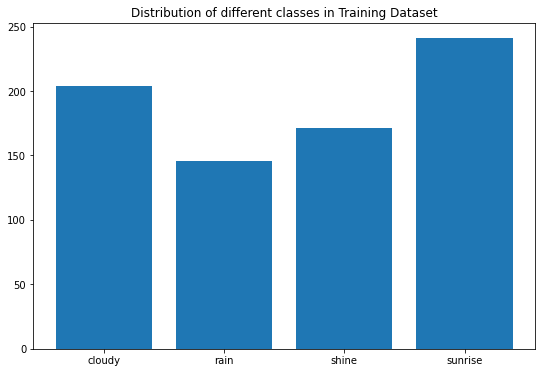

Training cloudy images are: 204
Training rain images are: 146
Training shine images are: 171
Training sunrise images are: 241


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'rain', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(train_dir+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
for i in ['cloudy','rain', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir(train_dir+i+'/'))))

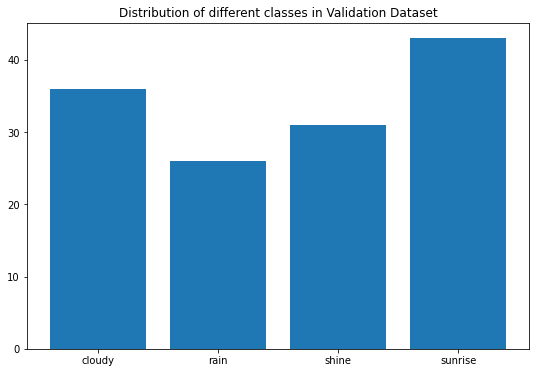

Valid cloudy images are: 36
Valid rain images are: 26
Valid shine images are: 31
Valid sunrise images are: 43


In [15]:
image_folder = ['cloudy', 'rain', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(val_dir+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()
for i in ['cloudy', 'rain', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir(val_dir+i+'/'))))

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 

In [17]:


train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

batch_size=16

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                      
                                                    target_size=(320, 320))

Found 762 images belonging to 4 classes.


In [18]:


validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                               shuffle=False,
                                                              target_size=(320, 320)
                                                             )

Found 136 images belonging to 4 classes.


In [19]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = base_dir + 'dense-model.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [20]:
'''
model = Sequential([
    Dense(32, activation='relu', input_shape=(320, 320, 3)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    #Dense(256, activation='relu'),
    #Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()
'''
model = Sequential([
    Flatten(input_shape=(320, 320, 3)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 307200)            0         
                                                                 
 dense (Dense)               (None, 8)                 2457608   
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               3

In [21]:
#model.load_weights( base_dir + 'dense-model.h5')
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])



In [22]:


history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
48/48 [==============================] - ETA: 0s - loss: 1.7267 - accuracy: 0.3071
Epoch 1: val_accuracy improved from -inf to 0.31618, saving model to /content/drive/My Drive/Kaggle/dense-model.h5
48/48 [==============================] - 26s 472ms/step - loss: 1.7267 - accuracy: 0.3071 - val_loss: 1.3969 - val_accuracy: 0.3162
Epoch 2/20
48/48 [==============================] - ETA: 0s - loss: 1.3726 - accuracy: 0.3163
Epoch 2: val_accuracy did not improve from 0.31618
48/48 [==============================] - 24s 494ms/step - loss: 1.3726 - accuracy: 0.3163 - val_loss: 1.3698 - val_accuracy: 0.3162
Epoch 3/20
48/48 [==============================] - ETA: 0s - loss: 1.3707 - accuracy: 0.3163
Epoch 3: val_accuracy did not improve from 0.31618
48/48 [==============================] - 23s 473ms/step - loss: 1.3707 - accuracy: 0.3163 - val_loss: 1.3694 - val_accuracy: 0.3162
Epoch 4/20
48/48 [==============================] - ETA: 0s - loss: 1.3716 - accuracy: 0.3163
Epoch 4: va

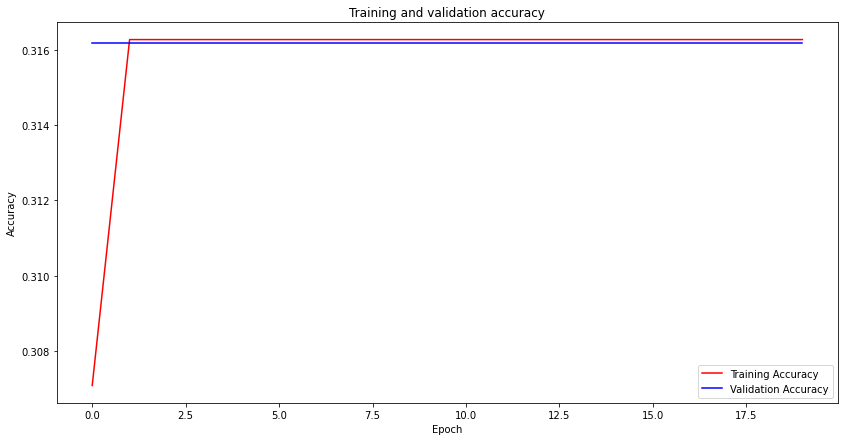

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

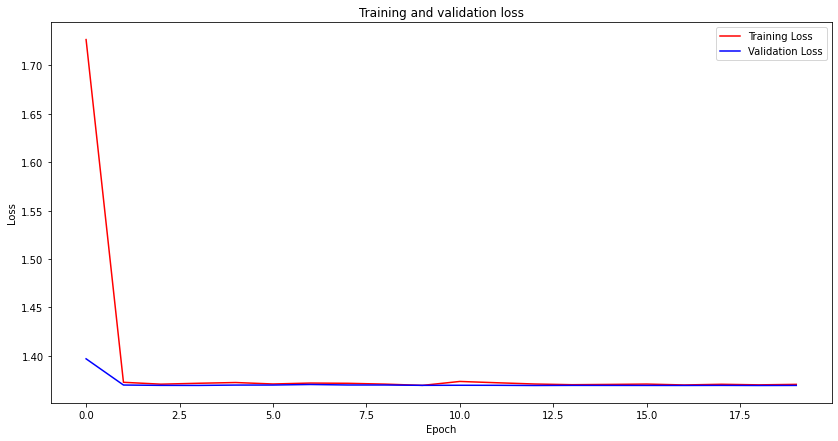

In [24]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Accuracy: 0.31617647409439087 Loss: 1.3693801164627075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Validate Predict Report===============

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.32      0.48       136

    accuracy                           0.32       136
   macro avg       0.25      0.08      0.12       136
weighted avg       1.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


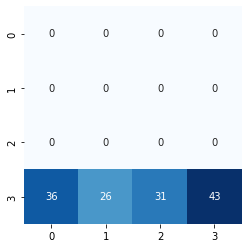

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



loss, acc = model.evaluate_generator(validation_generator)
print("Accuracy:",acc,"Loss:",loss)
probabilities = model.predict_generator(generator=validation_generator)
y_t = validation_generator.classes
print(y_t)
y_p=np.argmax(probabilities, axis=1)

print(y_p)
print('\n\nValidate Predict Report===============\n')
print(classification_report(y_p,y_t))
print('\n\nValidate Cunfusion Matrix===============\n')
matrix_confusion=(confusion_matrix(y_p,y_t))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

Found 226 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Accuracy: 0.3185840845108032 Loss: 1.3683459758758545


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


Validate Predict Report===============

              precision    recall  f1-

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


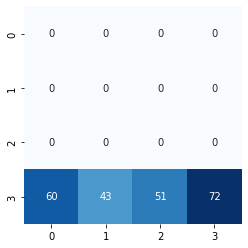

In [27]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                               shuffle=False,
                                                              target_size=(320, 320)
                                                             )

loss, acc = model.evaluate_generator(test_generator)
print("Accuracy:",acc,"Loss:",loss)
probabilities = model.predict_generator(generator=test_generator)
y_t = test_generator.classes
print(y_t)
y_p=np.argmax(probabilities, axis=1)

print(y_p)
print('\n\nValidate Predict Report===============\n')
print(classification_report(y_p,y_t))
print('\n\nValidate Cunfusion Matrix===============\n')
matrix_confusion=(confusion_matrix(y_p,y_t))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)